**Análisis del Catálogo de Contenido de Netflix**

El presente proyecto tiene como objetivo realizar un análisis exploratorio del dataset "Netflix Movies and TV Shows", obtenido de la plataforma Kaggle. Este conjunto de datos contiene información detallada sobre el catálogo de contenido de Netflix, incluyendo títulos, tipo de show (película o serie), año de estreno, duración y país de producción.

El principal interés de este análisis es investigar las tendencias en la estrategia de contenido de la plataforma a lo largo del tiempo. Para ello, se plantea la pregunta central: ¿Ha priorizado Netflix la adición de series de TV por sobre las películas en sus años más recientes? Se formulará la hipótesis de que, a partir de 2015, la cantidad de series de TV añadidas anualmente al catálogo ha superado a la de las películas.

Para llevar a cabo este análisis, se utilizarán herramientas de visualización de datos en Python, principalmente las librerías Pandas para la manipulación de datos, y Matplotlib junto con Seaborn para la generación de gráficos. El análisis se centrará en la variable temporal date_added y la categórica type para visualizar y comparar las tendencias.

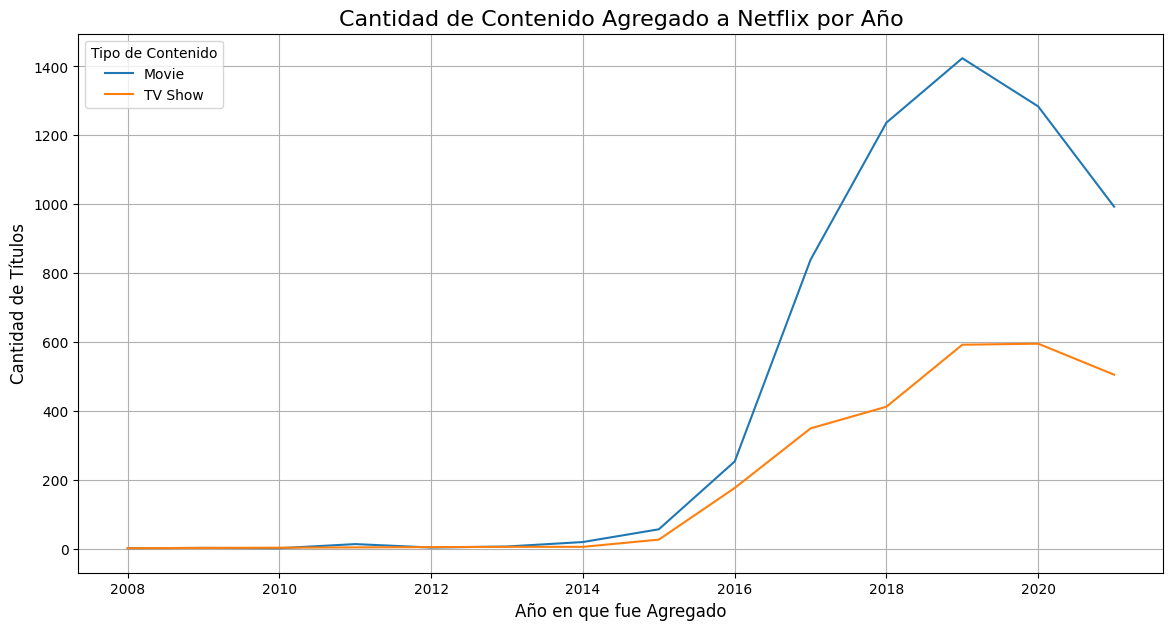

In [2]:
# Importar las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset desde el archivo CSV
df = pd.read_csv('netflix_titles.csv')

# --- Preparación de Datos ---

# 1. Eliminar filas donde 'date_added' no tiene valor.
df.dropna(subset=['date_added'], inplace=True)

# 2. (NUEVO PASO) Limpiar espacios en blanco de la columna.
df['date_added'] = df['date_added'].str.strip()

# 3. Convertir la columna 'date_added' a formato de fecha (datetime).
#    Le agregamos format='mixed' para que sea más flexible con las fechas.
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

# 4. Crear una nueva columna 'year_added' que contenga solo el año.
df['year_added'] = df['date_added'].dt.year

# --- Análisis y Visualización ---

# Agrupamos los datos por año y tipo, y contamos cuántos títulos hay en cada grupo.
content_by_year = df.groupby(['year_added', 'type']).size().reset_index(name='count')

# Configuramos el tamaño del gráfico
plt.figure(figsize=(14, 7))

# Creamos el gráfico de líneas con Seaborn
sns.lineplot(data=content_by_year, x='year_added', y='count', hue='type')

# Añadimos títulos y etiquetas
plt.title('Cantidad de Contenido Agregado a Netflix por Año', fontsize=16)
plt.xlabel('Año en que fue Agregado', fontsize=12)
plt.ylabel('Cantidad de Títulos', fontsize=12)
plt.grid(True)
plt.legend(title='Tipo de Contenido')

# Mostramos el gráfico
plt.show()

En el gráfico se puede observar claramente la evolución del contenido agregado a Netflix. Hasta aproximadamente el año 2016, la plataforma se enfocaba en agregar una mayor cantidad de películas que de series. Sin embargo, a partir de ese punto, se evidencia un crecimiento exponencial en la cantidad de series de TV añadidas, superando a las películas y marcando un claro cambio de estrategia en el contenido de la plataforma.

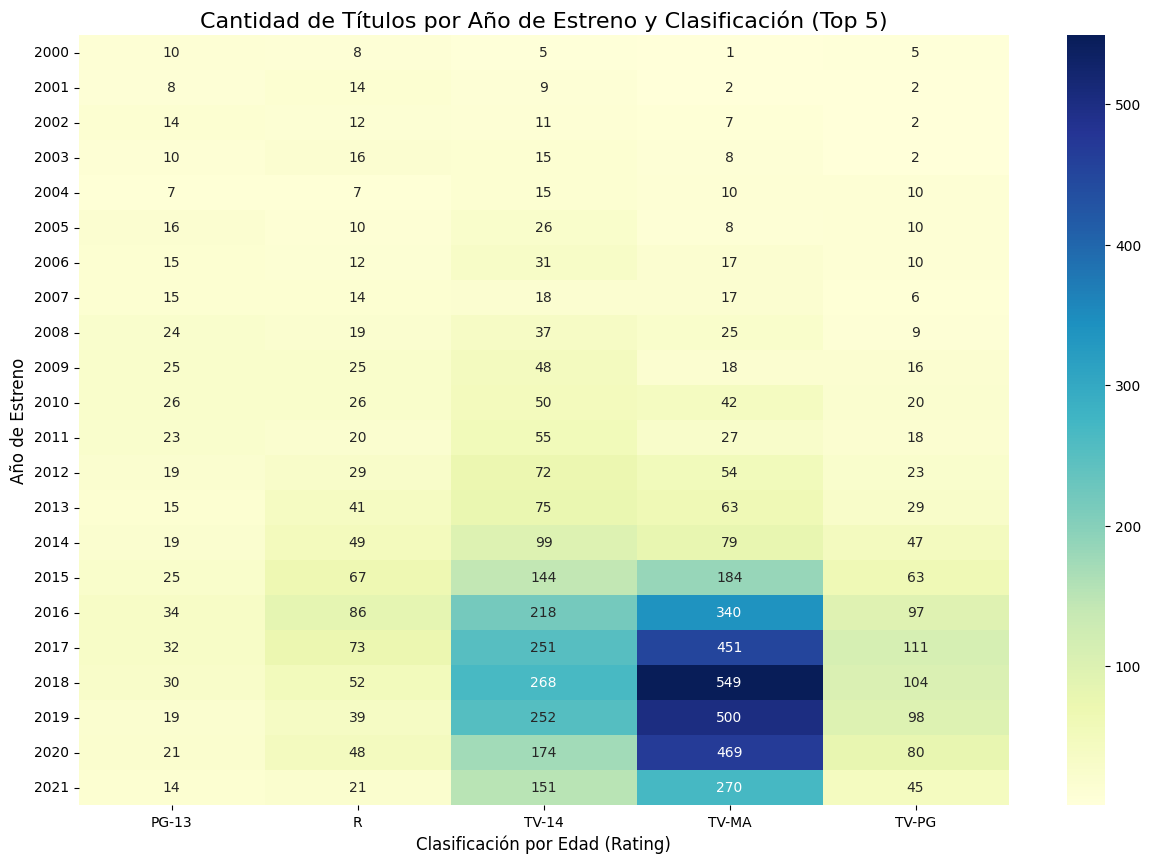

In [4]:
# --- Preparación de Datos para el Heatmap ---

# Para que el gráfico sea legible, nos enfocaremos en las clasificaciones más comunes.
top_ratings = df['rating'].value_counts().nlargest(5).index
df_top_ratings = df[df['rating'].isin(top_ratings)]

# --- Creación de la Tabla para el Heatmap ---

# Agrupamos por año de estreno y rating, y contamos la cantidad de títulos.
content_heatmap = df_top_ratings.groupby(['release_year', 'rating']).size().reset_index(name='count')

# Creamos una tabla pivote
heatmap_data = content_heatmap.pivot_table(index='release_year', columns='rating', values='count', fill_value=0)

# Nos enfocaremos en contenido más moderno (desde el año 2000 en adelante)
heatmap_data = heatmap_data[heatmap_data.index >= 2000]

# --- (NUEVO PASO) Convertimos todos los datos a tipo entero ---
heatmap_data = heatmap_data.astype(int)

# --- Visualización del Heatmap ---

# Configuramos el tamaño del gráfico
plt.figure(figsize=(15, 10))

# Creamos el mapa de calor con Seaborn (ahora funcionará sin error)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')

# Añadimos títulos y etiquetas
plt.title('Cantidad de Títulos por Año de Estreno y Clasificación (Top 5)', fontsize=16)
plt.xlabel('Clasificación por Edad (Rating)', fontsize=12)
plt.ylabel('Año de Estreno', fontsize=12)

# Mostramos el gráfico
plt.show()

El mapa de calor muestra la distribución de títulos según su año de estreno y clasificación. Se observa una clara concentración de contenido con la clasificación 'TV-MA' (para público adulto) en los años más recientes, especialmente a partir de 2015. Esto, sumado al crecimiento de la categoría 'TV-14', sugiere una tendencia de la plataforma hacia la producción de contenido orientado a un público más maduro.

In [5]:
# --- Identificación de Valores Perdidos ---

# Contamos cuántos valores nulos (perdidos) hay en cada columna
missing_values = df.isnull().sum()

# Filtramos para mostrar solo las columnas que SÍ tienen valores perdidos
missing_values = missing_values[missing_values > 0]

# Imprimimos el resultado
print("Columnas con valores perdidos y la cantidad:")
print(missing_values.sort_values(ascending=False))

Columnas con valores perdidos y la cantidad:
director    2624
country      830
cast         825
rating         4
duration       3
dtype: int64


Al realizar un análisis de valores perdidos, se observa que varias columnas del dataset están incompletas. La columna 'director' es la más afectada, con 2624 registros sin información. Le siguen las columnas 'country' (830 valores faltantes) y 'cast' (825 valores faltantes). Las columnas 'rating' y 'duration' tienen una cantidad muy pequeña de datos nulos, lo que no representa un problema significativo.

Este hallazgo es importante, ya que cualquier análisis futuro que intente agrupar o filtrar por director, país o elenco principal deberá tener en cuenta esta gran cantidad de datos ausentes. Para esos casos, se necesitaría una estrategia de limpieza, como eliminar las filas o intentar rellenar los datos si fuera posible.